#**Exponential smoothing**



##  install these libraries using pip:



In [70]:
!pip install pandas matplotlib

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing


## Loading dataset

In [72]:
df=pd.read_csv('traffic.csv',parse_dates=['DateTime'], index_col='DateTime')
df.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48120 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  48120 non-null  int64
 1   Vehicles  48120 non-null  int64
 2   ID        48120 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB


In [74]:
df.shape

(48120, 3)

In [75]:
df=df.iloc[0:1000]
df.shape

(1000, 3)

## Visualizing the data





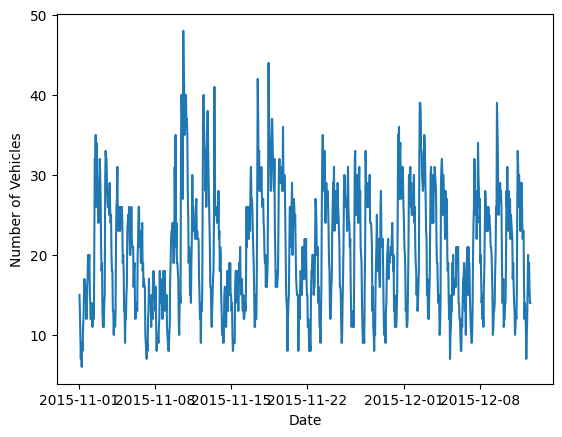

In [76]:
plt.plot(df['Vehicles'])
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.show()

#**Single Exponential smoothing**





In [84]:
model_SES = SimpleExpSmoothing(df['Vehicles'])
SES_train = model_SES.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions





In [86]:
pred_SES = SES_train.forecast(6)
print(pred_SES)


2015-12-12 16:00:00    14.000196
2015-12-12 17:00:00    14.000196
2015-12-12 18:00:00    14.000196
2015-12-12 19:00:00    14.000196
2015-12-12 20:00:00    14.000196
2015-12-12 21:00:00    14.000196
Freq: H, dtype: float64


## Visualize Single Exponential Smoothing




In [94]:
pred_SES = SES_train.forecast(60)

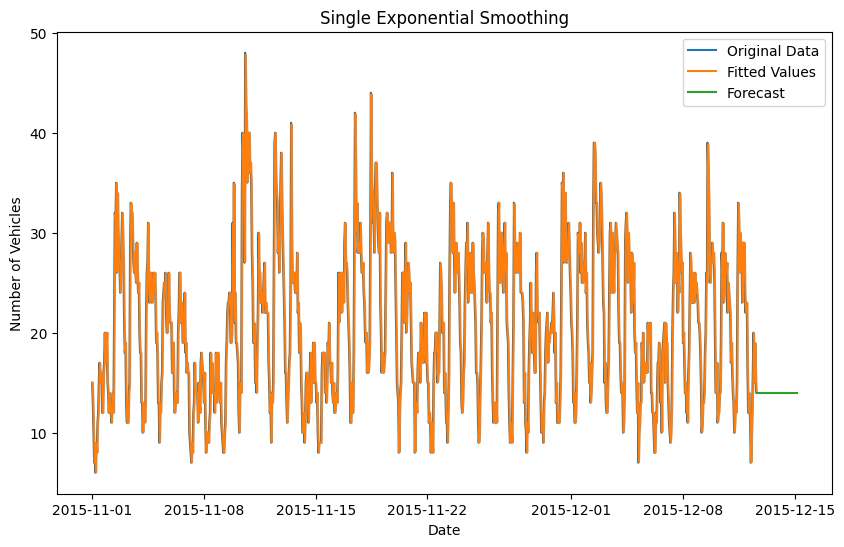

In [113]:
plt.figure(figsize=(10, 6))
plt.plot(df['Vehicles'], label='Original Data')
plt.plot(SES_train.fittedvalues, label='Fitted Values')
plt.plot(pred_SES, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.show()

#**Double Exponential Smoothing**




In [92]:
model_DES = Holt(df['Vehicles'])
DES_train = model_DES.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [93]:
pred_DES=DES_train.forecast(6)
print(pred_DES)

2015-12-12 16:00:00    13.923808
2015-12-12 17:00:00    13.847659
2015-12-12 18:00:00    13.771510
2015-12-12 19:00:00    13.695361
2015-12-12 20:00:00    13.619212
2015-12-12 21:00:00    13.543063
Freq: H, dtype: float64


## Visualize Double Exponential Smoothing




In [96]:
pred_DES = DES_train.forecast(60)

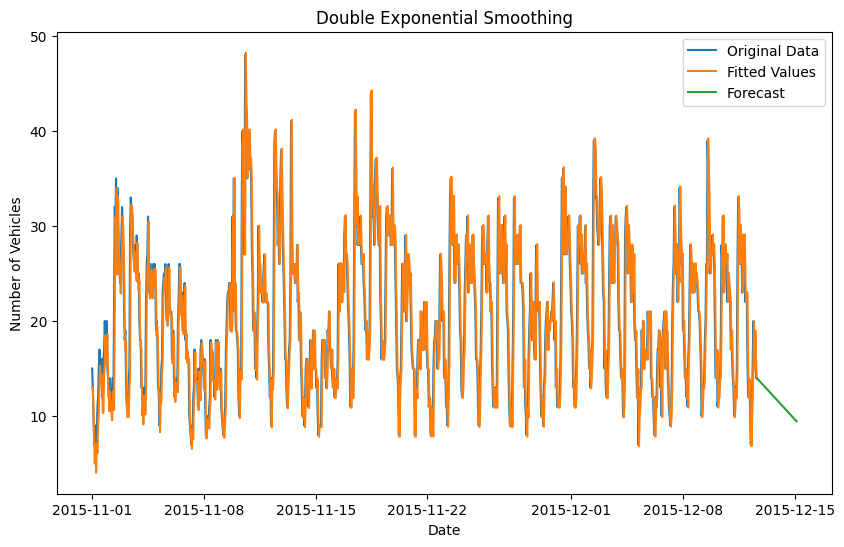

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(df['Vehicles'], label='Original Data')
plt.plot(DES_train.fittedvalues, label='Fitted Values')
plt.plot(pred_DES, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()

#**Holt-Winter’s Seasonal Smoothing**






In [100]:
# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    df['Vehicles'], seasonal_periods=12, trend='add', seasonal='add')
# Fit the model to the data
model_triple_fit = model_triple.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [101]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)

2015-12-12 16:00:00    12.493624
2015-12-12 17:00:00    11.577899
2015-12-12 18:00:00    12.781961
2015-12-12 19:00:00    14.275633
2015-12-12 20:00:00    14.985942
2015-12-12 21:00:00    17.215220
Freq: H, dtype: float64


## Visualize Triple Exponential Smoothing




In [109]:
forecast_triple = model_triple_fit.forecast(60)


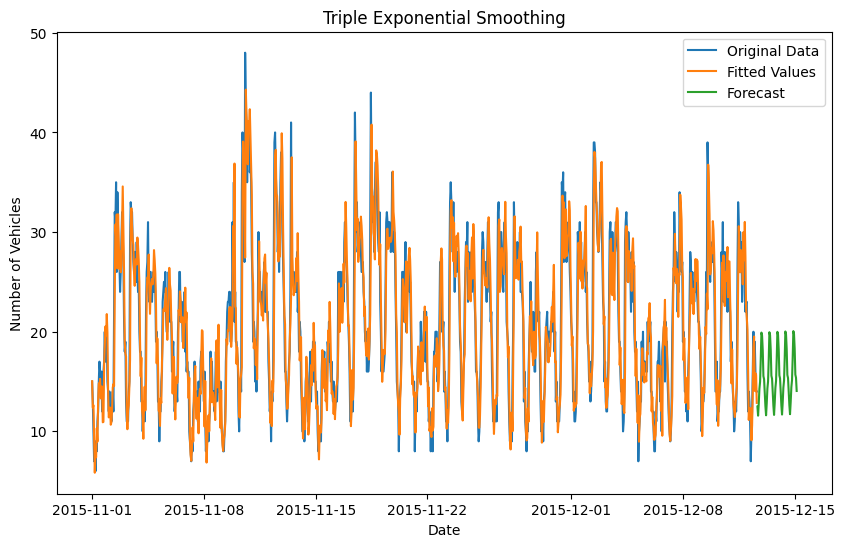

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(df['Vehicles'], label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()

##**Well done :)**